In [30]:

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [31]:
# Define dataset paths
train_dir = "/Users/samenergy/Downloads/untitled folder/Plant_Disease_Dataset/train"
valid_dir = "/Users/samenergy/Downloads/untitled folder/Plant_Disease_Dataset/valid"

In [32]:
# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels="inferred", label_mode="categorical",
    batch_size=64, image_size=(128, 128), shuffle=True
)

Found 70295 files belonging to 38 classes.


In [33]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir, labels="inferred", label_mode="categorical",
    batch_size=64, image_size=(128, 128), shuffle=True
)

Found 17572 files belonging to 38 classes.


In [34]:
# Combine train and validation datasets
full_dataset = train_dataset.concatenate(valid_dataset)

In [35]:
# Get class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)

Number of classes: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

In [36]:
# Normalize images (rescaling to [0,1])
normalization_layer = tf.keras.layers.Rescaling(1./255)
full_dataset = full_dataset.map(lambda x, y: (normalization_layer(x), y))

In [37]:
# Define the CNN Model with data augmentation
model = Sequential([
    # Data augmentation layers
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    
    Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)),
    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(512, kernel_size=3, activation='relu', padding='same'),
    Conv2D(512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Dropout(0.25),
    Flatten(),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

In [38]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Build the model explicitly with the input shape
model.build(input_shape=(None, 128, 128, 3))

# Now summary should work
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 128, 128, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                

In [40]:
# Train the model on full dataset
epochs = 10
history = model.fit(full_dataset, epochs=epochs)

Epoch 1/10
1374/1374 [==============================] - 1233s 897ms/step - loss: 2.0221 - accuracy: 0.4064
Epoch 2/10
1374/1374 [==============================] - 1188s 865ms/step - loss: 0.8917 - accuracy: 0.7166
Epoch 3/10
1374/1374 [==============================] - 1215s 884ms/step - loss: 0.5875 - accuracy: 0.8113
Epoch 4/10
1374/1374 [==============================] - 1221s 889ms/step - loss: 0.4293 - accuracy: 0.8594
Epoch 5/10
1374/1374 [==============================] - 1176s 856ms/step - loss: 0.3433 - accuracy: 0.8881
Epoch 6/10
1374/1374 [==============================] - 1195s 870ms/step - loss: 0.2769 - accuracy: 0.9084
Epoch 7/10
1374/1374 [==============================] - 1195s 869ms/step - loss: 0.2375 - accuracy: 0.9212
Epoch 8/10
1374/1374 [==============================] - 1188s 865ms/step - loss: 0.2066 - accuracy: 0.9311
Epoch 9/10
1374/1374 [==============================] - 1194s 869ms/step - loss: 0.1780 - accuracy: 0.9396
Epoch 10/10
1374/1374 [==============

In [41]:
# Evaluate on full dataset
full_loss, full_acc = model.evaluate(full_dataset)
print(f"Full Dataset Loss: {full_loss}, Full Dataset Accuracy: {full_acc}")

1374/1374 [==============================] - 319s 232ms/step - loss: 0.2151 - accuracy: 0.9288
Full Dataset Loss: 0.21513721346855164, Full Dataset Accuracy: 0.9287787079811096


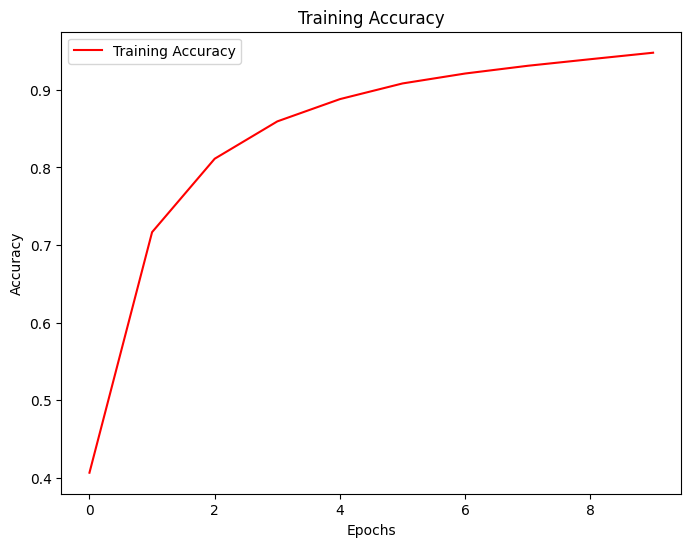

In [42]:
# Plot accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.show()

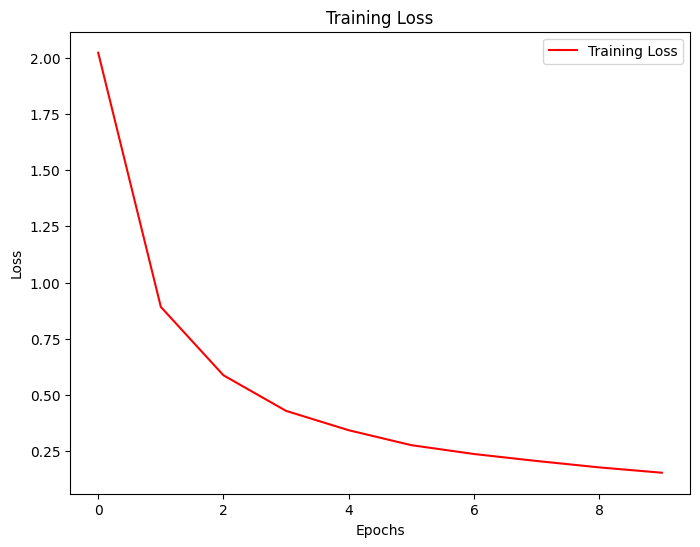

In [43]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

In [49]:
# Save the model
model.save("plant_disease_model.h5")

import pickle
with open("plant_disease_model_full_augmented.pkl", "wb") as f:
    pickle.dump(model, f)

/Users/samenergy/Documents/Projects/appdeploy/env/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
# Get predictions and true labels for full dataset
y_true = []
y_pred = []

for images, labels in full_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

2/2 [==============================] - 0s 20ms/step


In [46]:
# Generate classification report
print(classification_report(y_true, y_pred, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.77      0.86      2520
                                 Apple___Black_rot       0.98      0.74      0.84      2484
                          Apple___Cedar_apple_rust       0.97      0.94      0.96      2200
                                   Apple___healthy       0.93      0.88      0.90      2510
                               Blueberry___healthy       0.97      0.96      0.96      2270
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.97      2104
                 Cherry_(including_sour)___healthy       0.96      0.95      0.95      2282
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.98      0.92      2052
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99      2384
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.89      0.

In [47]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

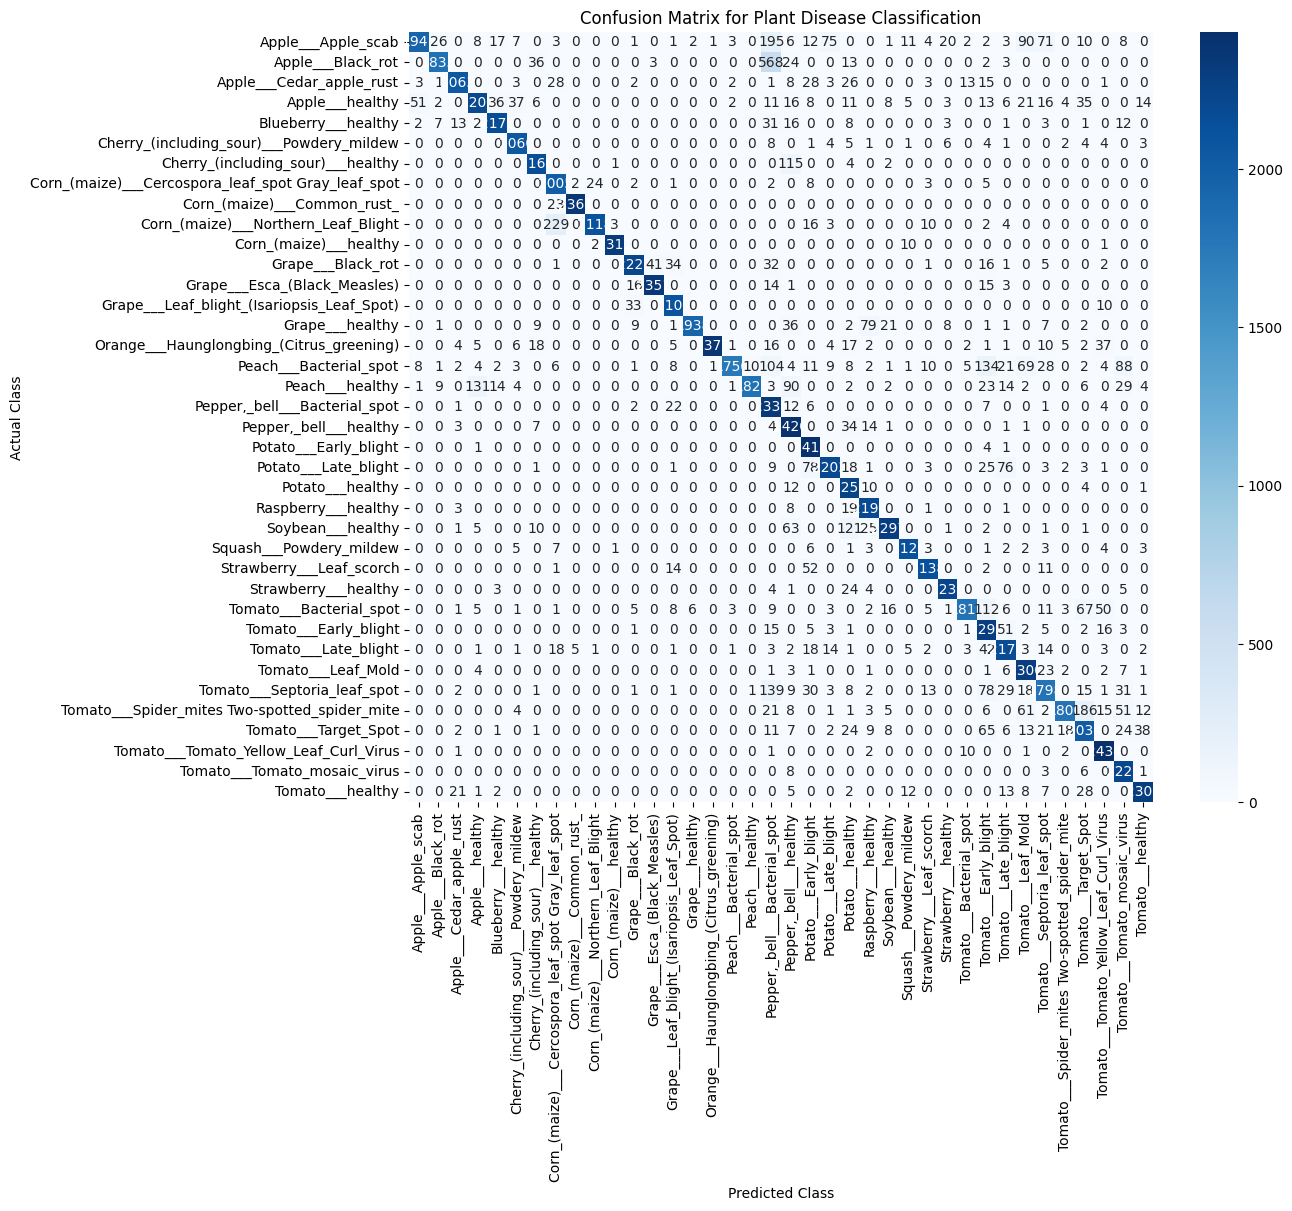

In [48]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for Plant Disease Classification")
plt.show()